In [1]:
import pandas as pd
import numpy as np
from tabulate import tabulate
df=pd.read_excel(r"C:\Users\SuryaKrishna\Desktop\HR LAB-5th SEM\HRlab.xlsx",sheet_name="Cost and Productivity",header=1)
df.head(5)

,Number of hires,Induction program cost,New hires performance satisfaction,Performance Differential,Time to fill(days),Industry
0,20,4000,0.90,0.05,30,Textiles
1,10,1000,0.85,0.03,45,Textiles
2,2,3500,0.75,0.02,60,Textiles
3,4,500,0.80,0.04,40,Textiles
4,3,1500,0.87,0.06,35,Textiles


In [13]:
Time_to_fill_by_hires = df.groupby('New hires performance satisfaction')['Time to fill(days)'].mean()
Performance_satisfaction_by_Differential = df.groupby('Performance Differential')['New hires performance satisfaction'].mean()
print(Time_to_fill_by_hires)
print(Performance_satisfaction_by_Differential)

New hires performance satisfaction
0.75    60.0
0.80    40.0
0.85    45.0
0.87    35.0
0.90    30.0
Name: Time to fill(days), dtype: float64
Performance Differential
0.02    0.75
0.03    0.85
0.04    0.80
0.05    0.90
0.06    0.87
Name: New hires performance satisfaction, dtype: float64


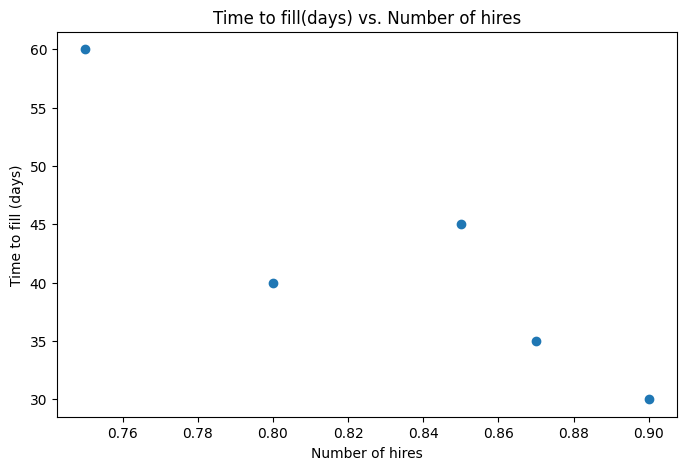

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(Time_to_fill_by_hires.index, Time_to_fill_by_hires.values)
plt.xlabel('Number of hires')
plt.ylabel('Time to fill (days)')
plt.title('Time to fill(days) vs. Number of hires')
plt.show()

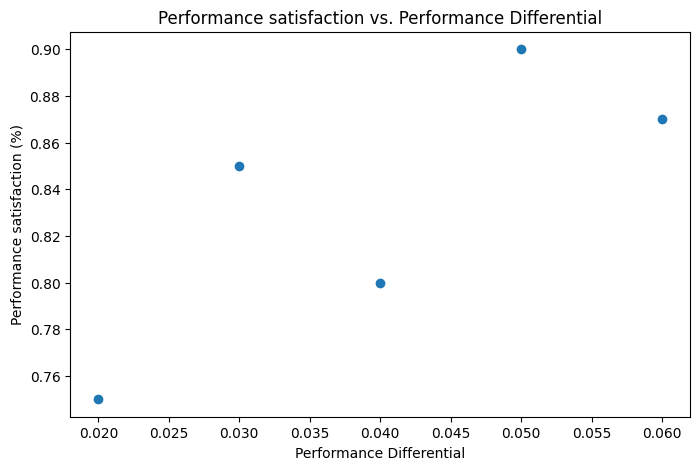

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(Performance_satisfaction_by_Differential.index, Performance_satisfaction_by_Differential.values)
plt.xlabel('Performance Differential')
plt.ylabel('Performance satisfaction (%)')
plt.title('Performance satisfaction vs. Performance Differential')
plt.show()

In [20]:
#the correlation coefficient between time to fill and sourcing channel, and between performance satisfaction and sourcing channel:
correlation_time_to_fill = np.corrcoef(Time_to_fill_by_hires.values, df['Number of hires'].astype('category').cat.codes)[0, 1]
correlation_Performance_satisfaction= np.corrcoef(Performance_satisfaction_by_Differential.values, df['Performance Differential'].astype('category').cat.codes)[0, 1]
print(correlation_time_to_fill)
print(correlation_Performance_satisfaction)

0.5494422557947561
0.10644925908246969


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_excel("C:\Users\SuryaKrishna\Desktop\HR LAB-5th SEM\HRlab.xlsx", sheet_name="Cost and Productivity")

# Encode the sourcing channel as a numerical variable
encoded_sourcing_channel = pd.get_dummies(df['Sourcing Channel'].astype('category'))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(encoded_sourcing_channel, df['Time to fill(days)'], test_size=0.25)

In [21]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Evaluate the model's performance on the test set
y_pred = model.predict(X_test)
r2_score = model.score(X_test, y_test)

# Print the R-squared score
print(r2_score)

NameError: name 'X_train' is not defined

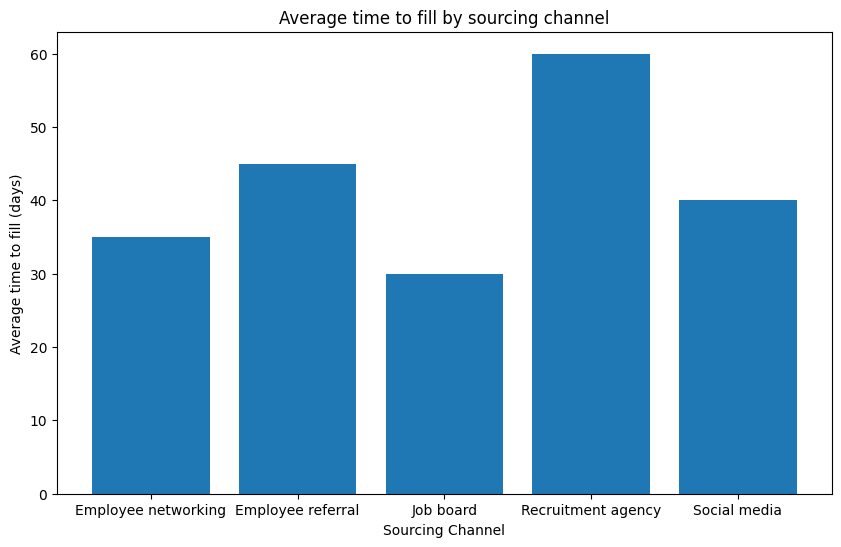

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data
df = pd.read_excel("D:\khaleef 2\HR analytics lab\Ex4.xlsx", sheet_name="Cost & Productivity")

# Calculate the average time to fill for each sourcing channel
avg_time_to_fill_by_sourcing_channel = df.groupby('Sourcing Channel')['Time to fill(days)'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_time_to_fill_by_sourcing_channel.index, avg_time_to_fill_by_sourcing_channel.values)
plt.xlabel('Sourcing Channel')
plt.ylabel('Average time to fill (days)')
plt.title('Average time to fill by sourcing channel')
plt.show()